# Build a Naive Bayes model

**Scenario:** For this activity, you work for a firm that provides insights for management and coaches in the National Basketball Association (NBA), a professional basketball league in North America. The league is interested in retaining players who can last in the high-pressure environment of professional basketball and help the team be successful over time. In the previous activity, you analyzed a subset of data that contained information about the NBA players and their performance records. You conducted feature engineering to determine which features would most effectively predict a player's career duration. You will now use those insights to build a model that predicts whether a player will have an NBA career lasting five years or more.

**Goal:** Develop a model to predict whether or not an NBA player's chance of playing for five years or more.

## Task 1: Imports and data loading

In [1]:
# Import relevant libraries and modules.

import pandas as pd
from sklearn import naive_bayes
from sklearn import model_selection
from sklearn import metrics

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# Import data
df = pd.read_csv('/content/gdrive/My Drive/Coursera/Data/extracted_nba_players_data.csv')

### Display the data

Review the first 10 rows of data.

In [5]:
# Display the first 10 rows of data.
df.head(10)

,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0,266.4,0.270073
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0,252.0,0.267658
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0,384.8,0.339869
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1,330.6,0.491379
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1,216.0,0.391304
5,42.3,32.5,73.2,0.8,1.8,0.4,0.0,0.7,0,277.5,0.324561
6,43.5,50.0,81.1,2.0,0.6,0.2,0.1,0.7,1,409.2,0.605505
7,41.5,30.0,87.5,1.7,0.2,0.2,0.1,0.7,1,273.6,0.553398
8,39.2,23.3,71.4,0.8,2.3,0.3,0.0,1.1,0,156.0,0.242424
9,38.3,21.4,67.8,1.1,0.3,0.2,0.0,0.7,0,155.4,0.435294


In [16]:
# Check the proportion of target value
df["target_5yrs"].value_counts()/len(df)

target_5yrs
1    0.620149
0    0.379851
Name: count, dtype: float64

## Task 2: Model

**Split the data**

In [11]:
# Isolate target variable (y)
y = df[['target_5yrs']]

# Isolate the features (X)
X = df.drop(columns = 'target_5yrs')

# Split into train and test sets. Put 25% of the samples into the test set, stratify the data, and set the random state
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=0)

**Build Naive Bayes model**

In [12]:
# Create the GaussianNB model
model = naive_bayes.GaussianNB()

# Fit the model on your training data.
model.fit(X_train, y_train)

# Apply your model to predict on your test data. Call this "y_pred".
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Results and evaluation**

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='weighted')  # Weighted average for imbalanced data

precision = precision_score(y_test, y_pred)  # Weighted average for imbalanced data
recall = recall_score(y_test, y_pred)  # Weighted average for imbalanced data
f1 = f1_score(y_test, y_pred)  # Weighted average for imbalanced data

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.6895522388059702
Precision: 0.8405797101449275
Recall: 0.5858585858585859
F1-score: 0.6904761904761905


Note:
1. The model shows a precision score of 0.8406, which means the model is quite good at predicting true positives (the player will play longer than five years—while balancing false positives).
2. The recall score of 0.5859 shows worse performance in predicting true negatives (the player will not play for five years or more—while balancing false negatives).
3. The F1 score balances the precision and recall performance to give a combined assessment of how well this model delivers predictions. In this case, the F1 score is 0.6905, which suggests reasonable predictive power in this model.

**Create Confusion matrix**

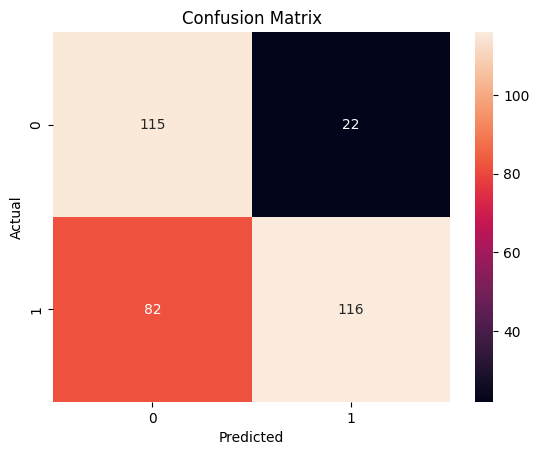

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create confusion matrix heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='g')  # Annotate with counts, format as 'g' (general)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Note:
1. The concentration of true positives stands out relative to false positives. This ratio is why the precision score is so high (0.8406).
2. True negatives and false negatives are closer in number, which explains the worse recall score.

## Task 3: Conclusion

1. The model created provides some value in predicting an NBA player's chances of playing for five years or more.
2. The model performed better at predicting true positives than it did at predicting true negatives, which means the model more accurately identified those players who will likely play for more than five years than it did those who likely will not.